# SI 618 Homework 9

### Overview

The purpose of this homework is to give you more experience with data aggregation in Python, visualization using plotnine, a grammar of graphics implementation almost identical to ggplot in R,  and time-series analysis on a real-world dataset. You will be analyzing Wikipedia page popularity over an 18 month period from July 2015 to December 2016. The dataset is from (https://www.kaggle.com/c/web-traffic-time-series-forecasting/data), but we have provided the CSV (page_views.csv) for you. We have also provided an example document (si618_hw9_solution.html) of the intended solution.

## Question 0: Loading data and preprocessing (5 points)

Load the data (page_views.csv) and remove NA values. (There are many ways to handle missing data, we choose to remove rows for the purpose of this assignment.) 

In [1]:
import pandas as pd
page_df = pd.read_csv('page_views.csv')
page_df = page_df.dropna(axis = 'rows')
page_df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144944,Chichén_Itzá_es.wikipedia.org_all-access_spider,8.0,13.0,19.0,14.0,6.0,5.0,10.0,9.0,5.0,...,15.0,18.0,12.0,6.0,5.0,14.0,10.0,174.0,8.0,19.0
144945,Fecundación_es.wikipedia.org_all-access_spider,29.0,16.0,6.0,11.0,33.0,4.0,11.0,16.0,10.0,...,8.0,8.0,13.0,3.0,6.0,10.0,16.0,10.0,7.0,8.0
144946,Gran_Hermano_VIP_(España)_es.wikipedia.org_all...,4.0,25.0,7.0,11.0,6.0,6.0,16.0,11.0,23.0,...,12.0,299.0,46.0,5.0,11.0,77.0,523.0,110.0,171.0,43.0
144947,Modelo_atómico_de_Thomson_es.wikipedia.org_all...,0.0,2.0,6.0,6.0,7.0,5.0,4.0,6.0,7.0,...,13.0,1.0,5.0,11.0,9.0,11.0,6.0,7.0,9.0,4.0


## Question 1: Average Popularity Analysis (20 points)

#### Question 1-a: Plot the distribution of the average popularity of pages. (10 points)

Hint: You can use stat_ecdf of plotnine to plot a CDF (cumulative distribution function) 

Hint2: You can use the mizani package to format the labels in the figure with commas.

Your plot should look something like this. Note that there is one data point that will be removed while creating this plot. This will happen due to the use of logarithmic scale. You can handle that in different ways. Given that this only affects one row, in this case we chose to ignore it. You can plot this distribution in linear scale first to see why logairthmic scale is needed.

D:\Software\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
D:\Software\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_ecdf : Removed 1 rows containing non-finite values.


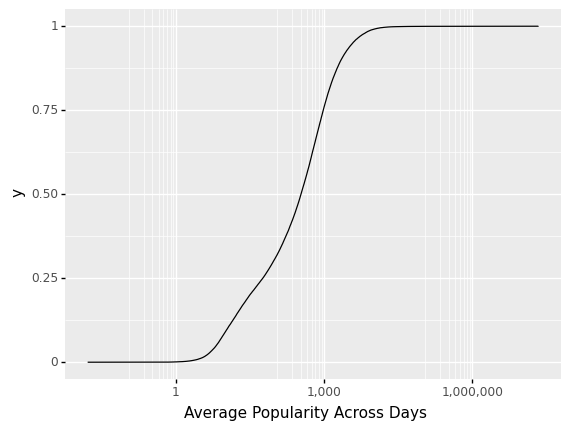

<ggplot: (91804980020)>

In [2]:
from plotnine import stat_ecdf, ggplot, aes, scale_x_log10
import numpy as np
from mizani.formatters import comma_format

q1_df = page_df.drop('Page', axis = 1)
avg_df = pd.DataFrame(q1_df.mean(axis=1))
avg_df.columns = ['Average Popularity Across Days']
avg_df
ggplot(avg_df, aes(x='Average Popularity Across Days')) + stat_ecdf() + scale_x_log10(labels = comma_format())


#### Question 1-b: What are the top-10 and bottom-10 pages with regards to popularity? (10 points)

In [3]:
import math
pd.options.display.max_colwidth = 100

q2_df = page_df.drop('Page', axis = 1)
popularity = q2_df.mean(axis = 1)
q2_df = pd.concat([page_df['Page'], popularity.rename('avg_popularity')], axis=1)

q2_top = q2_df.copy()
q2_top['avg_popularity'] = q2_top['avg_popularity'].map(lambda x: math.ceil(x))
q2_top = q2_top.sort_values('avg_popularity', ascending=False)
q2_top[:10]


,Page,avg_popularity
38573,Main_Page_en.wikipedia.org_all-access_all-agents,21938512
9774,Main_Page_en.wikipedia.org_desktop_all-agents,15953632
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,5734518
139119,Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents,2916245
39180,Special:Search_en.wikipedia.org_all-access_all-agents,2371054
116196,Wikipedia:Hauptseite_de.wikipedia.org_mobile-web_all-agents,2023072
99322,Заглавная_страница_ru.wikipedia.org_all-access_all-agents,1974581
10403,Special:Search_en.wikipedia.org_desktop_all-agents,1839724
27330,Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents,1579056
92205,Wikipedia:Portada_es.wikipedia.org_all-access_all-agents,1366350


In [4]:
q2_bottom = q2_df.copy()
q2_bottom['avg_popularity'] = q2_bottom['avg_popularity'].map(lambda x: '%.7f'%x)
q2_bottom = q2_bottom.sort_values('avg_popularity')
q2_bottom[:10]


,Page,avg_popularity
83600,Special:EditWatchlist_www.mediawiki.org_all-access_spider,0.0000000
143185,Especial:Seguimiento_es.wikipedia.org_all-access_spider,0.0163636
124535,Служебная:Список_наблюдения_ru.wikipedia.org_all-access_spider,0.0200000
15253,Special:EditWatchlist_commons.wikimedia.org_all-access_spider,0.0490909
83716,Special:Preferences_www.mediawiki.org_all-access_spider,0.0509091
15280,User:Willemnabuurs_commons.wikimedia.org_all-access_spider,0.0563636
14584,Special:Preferences_commons.wikimedia.org_all-access_spider,0.0672727
14622,User:JurgenNL/speedy_commons.wikimedia.org_all-access_spider,0.0690909
83713,Special:OAuth/authorize_www.mediawiki.org_all-access_spider,0.0690909
15603,User:Rotatebot/approx_max_wait_time_rotatelink_commons.wikimedia.org_all-access_spider,0.0890909


## Question 2: Day-of-the-week Effect (15 points)

Is there a day-of-the-week effect on Wikipedia? On average, which day sees the most Wikipedia views (total across all articles)? What about the least views?

In [5]:
from datetime import datetime
weekday_df = page_df.drop('Page', axis=1)
weekday_df.columns = [pd.to_datetime(each).strftime('%A') for each in weekday_df.columns]
views = pd.Series([weekday_df[each].sum().mean() for each in weekday_df.columns.unique()]).rename('views')
weekdays = pd.Series(weekday_df.columns.unique()).rename('day')
final_df = pd.concat([weekdays, views], axis=1).sort_values('views', ascending=False).reset_index(drop=True)
final_df['views'] = final_df['views'].map(lambda x: "%i"%x)
final_df

,day,views
0,Monday,191948744
1,Sunday,186714033
2,Tuesday,184840493
3,Wednesday,182450695
4,Thursday,178039318
5,Saturday,172645250
6,Friday,172204776


There is a day-of-the-week effect on Wikipedia where there are more views on the first half of the week and less on the second half. Monday sees the most Wikipedia views and Friday sees the least views.

## Question 3: Wikipedia views per day (30  points)

Plot Wikipedia views per day (total across all pages) over time. Then plot the de-seasonified data where the day-of-the-week effects are removed.

Hint: Use mizani package to get the correct formatting for the axis labels

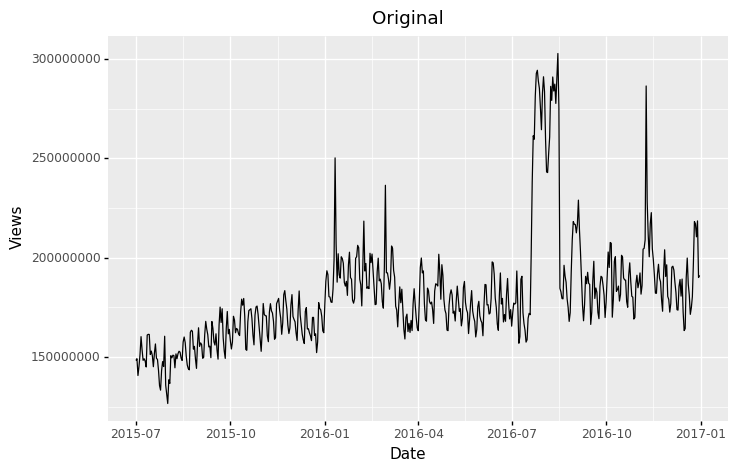

<ggplot: (91838111994)>

In [6]:
from plotnine import scale_x_datetime, geom_line, ggplot, aes, theme, ggtitle
from mizani.breaks import date_breaks
from mizani.formatters import date_format
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

q3_df = page_df.drop('Page', axis=1)
q3_df = pd.DataFrame(q3_df.sum()).reset_index()
q3_df.columns = ['Date', 'Views']
ggplot(q3_df, aes('Date', 'Views')) + geom_line(aes(group = 1)) + scale_x_datetime(breaks=date_breaks('3 months'), labels=(date_format('%Y-%m'))) + theme(figure_size=(8, 5)) + ggtitle('Original') 

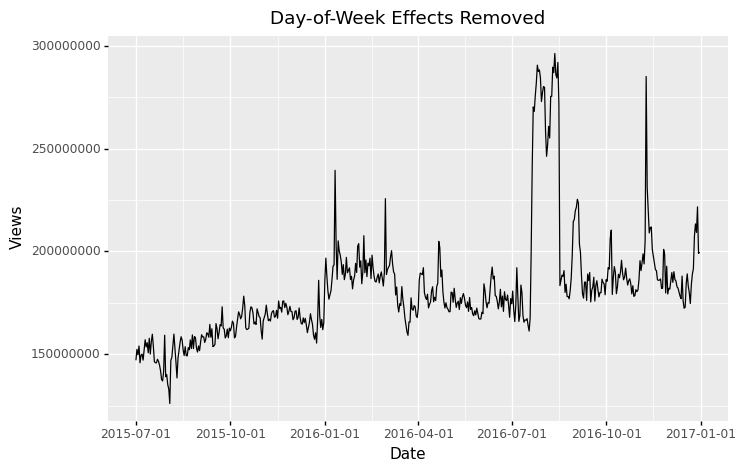

<ggplot: (91838108073)>

In [8]:
q3_remove = pd.DataFrame(weekday_df.sum().reset_index())
q3_remove.columns = ['day', 'views']
model3 = smf.ols('views ~ C(day)', data=q3_remove).fit()
q3_df['Views'] = q3_remove['views'].mean() + model3.resid
ggplot(q3_df, aes('Date', 'Views')) + geom_line(aes(group = 1)) + scale_x_datetime(breaks=date_breaks('3 months')) + theme(figure_size=(8, 5)) + ggtitle('Day-of-Week Effects Removed')

## Question 4: Repeat Q3 for the top 50K articles (30 points)

Repeat Q3 for the top 50K articles. For this you will need to first find the top 50K pages and limit your dataset to those. We define these top pages as those with the largest number of overall page views. Next you need to find the day of the week effect for this subset and plot the two time series.

In [9]:
q4_df = page_df.copy()
q4_df['sum'] = page_df.sum(axis=1)
q4_df = q4_df.sort_values('sum', ascending=False)[:50000]
q4_df

<ipython-input-9-af9f22dbcfdb>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,sum
38573,Main_Page_en.wikipedia.org_all-access_all-agents,20381245.0,20752194.0,19573967.0,20439645.0,20772109.0,22544669.0,21210887.0,19107911.0,19993848.0,...,22539246.0,25056620.0,25865746.0,28342885.0,26916991.0,27025053.0,26073819.0,24363967.0,26149541.0,1.206618e+10
9774,Main_Page_en.wikipedia.org_desktop_all-agents,11952559.0,12344021.0,11195848.0,11982470.0,12379684.0,14164829.0,12917172.0,11089923.0,12067334.0,...,16634676.0,18554711.0,18918826.0,21473188.0,20065005.0,19751910.0,19211634.0,17100925.0,19591761.0,8.774497e+09
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,8039732.0,8018607.0,7980511.0,8024814.0,7929962.0,7959839.0,7892357.0,7607871.0,7515302.0,...,3816041.0,3728439.0,4168094.0,4243273.0,4097335.0,4168668.0,4100929.0,4118692.0,3939419.0,3.153985e+09
139119,Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents,2983623.0,2965848.0,2900702.0,2687450.0,2827409.0,3062343.0,2999196.0,2995270.0,2995810.0,...,3520937.0,3188722.0,3643490.0,3903606.0,3907598.0,3732014.0,3577128.0,3514084.0,3286214.0,1.603934e+09
39180,Special:Search_en.wikipedia.org_all-access_all-agents,2034850.0,1984412.0,1763117.0,1620136.0,1766701.0,2108408.0,2118720.0,2052391.0,2300186.0,...,1734854.0,1473229.0,1421005.0,1769730.0,1902057.0,1816849.0,1895763.0,1811624.0,1576945.0,1.304079e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99260,"Сафронов,_Никас_Степанович_ru.wikipedia.org_all-access_all-agents",162.0,175.0,332.0,564.0,504.0,444.0,373.0,294.0,324.0,...,740.0,508.0,401.0,316.0,362.0,289.0,295.0,246.0,251.0,2.602890e+05
88626,片山さつき_ja.wikipedia.org_desktop_all-agents,112.0,201.0,136.0,94.0,110.0,179.0,118.0,196.0,138.0,...,83.0,58.0,61.0,63.0,72.0,70.0,60.0,76.0,46.0,2.602690e+05
121869,長洲未来_ja.wikipedia.org_all-access_all-agents,72.0,72.0,73.0,87.0,58.0,61.0,64.0,67.0,73.0,...,134.0,286.0,439.0,206.0,168.0,113.0,111.0,82.0,60.0,2.602690e+05
105170,T.O.P._zh.wikipedia.org_mobile-web_all-agents,481.0,433.0,411.0,679.0,577.0,437.0,423.0,442.0,450.0,...,586.0,569.0,555.0,598.0,904.0,792.0,1010.0,973.0,917.0,2.602520e+05


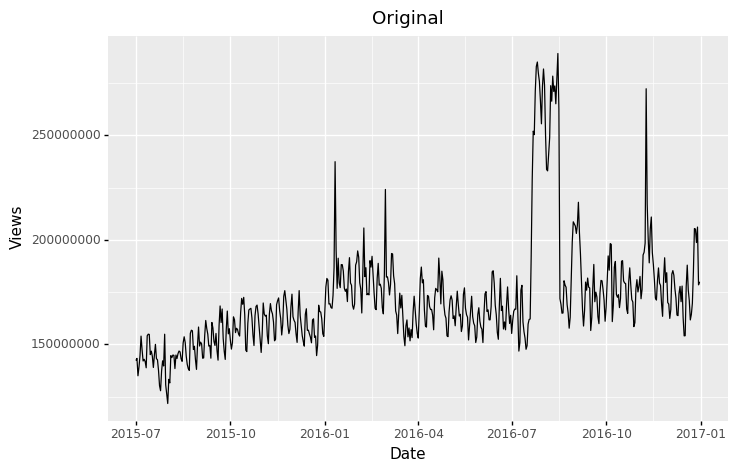

<ggplot: (126452918257)>

In [26]:
q4_df = q4_df.drop(['Page', 'sum'], axis=1)
q4_df = pd.DataFrame(q4_df.sum()).reset_index()
q4_df.columns = ['Date', 'Views']
ggplot(q4_df, aes('Date', 'Views')) + geom_line(aes(group = 1)) + scale_x_datetime(breaks=date_breaks('3 months'), labels=(date_format('%Y-%m'))) + theme(figure_size=(8, 5)) + ggtitle('Original') 

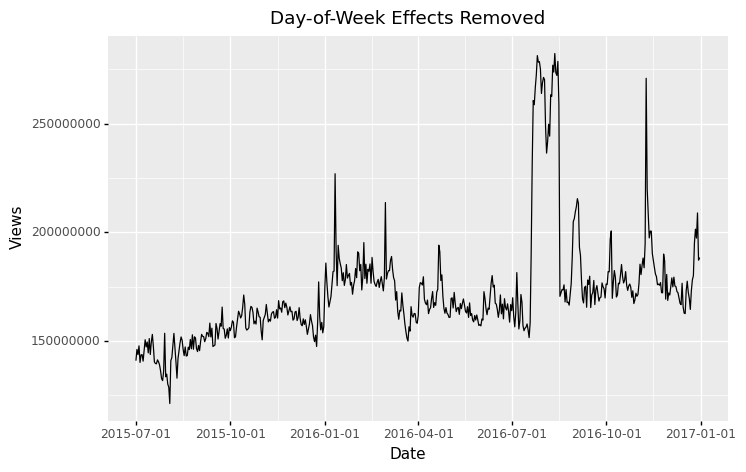

<ggplot: (126453532209)>

In [28]:
weekday_50k = weekday_df.copy()
weekday_50k['sum'] = pd.Series(weekday_50k.sum(axis=1))
weekday_50k = weekday_50k.sort_values('sum', ascending=False).drop('sum', axis=1)[:50000]

q4_remove = pd.DataFrame(weekday_50k.sum().reset_index())
q4_remove.columns = ['day', 'views']
model4 = smf.ols('views ~ C(day)', data=q4_remove).fit()
q4_df['Views'] = q4_remove['views'].mean() + model4.resid
ggplot(q4_df, aes('Date', 'Views')) + geom_line(aes(group = 1)) + scale_x_datetime(breaks=date_breaks('3 months')) + theme(figure_size=(8, 5)) + ggtitle('Day-of-Week Effects Removed')

## What to submit

* The jupyter notebook file named 'uniquename_si618_hw9.ipynb'
* The HTML or PDF report generated by your notebook file that should similar to si618_hw9_solution.html